Link to medium article
https://medium.com/@agarwal.bh/multi-class-image-classification-model-using-cnn-dcf7eaa3391b


In [1]:
#install the below set of libraries

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
#if using colab, mount the drive to access data, log data and save models as we move further

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#to get the list of libraries installed

# !pip list

In [4]:
import tensorflow as tf
import os

In [5]:
#to avoid out of memory error, we set the configuration to GPU (this also helps in faster execution)

gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
import cv2
import imghdr

In [7]:
main_dir = '/content/drive/MyDrive/Multiclass_Image_classification'
data_dir_name = 'data/real_data'
test_data_dir_name = 'data/test_data_forperformancetesting/Images'
log_data_folder_name = 'logs'

In [8]:
data_dir = os.path.join(main_dir,data_dir_name)
test_data_dir = os.path.join(main_dir,test_data_dir_name)
log_folder_path = os.path.join(main_dir,log_data_folder_name)

In [9]:
image_ext = ['jpeg', 'jpg', 'png', 'bmp']

##Removing low quality images or images with unsupported/irrelevant extensions

In [10]:
#removing images of low quality or unsupported extension

for i in os.listdir(data_dir): 
  print(f"Removing dodgy images from folder {i}")
  for image in os.listdir(os.path.join(data_dir,i)):
    image_path = os.path.join(data_dir,i,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if (round(os.stat(image_path).st_size/1024) < 10) or (tip not in image_ext):
        os.remove(image_path)
    except:
      print("Image is corrupted: {}".format(image_path))
    

Removing dodgy images from folder honeybee
Removing dodgy images from folder bumblebee
Removing dodgy images from folder ants
Removing dodgy images from folder butterfly
Removing dodgy images from folder milkweedbug
Removing dodgy images from folder beetle
Removing dodgy images from folder grasshopper
Removing dodgy images from folder snail
Removing dodgy images from folder dragonfly


##Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#loading data from the given directory using tf.data.dataset 

data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1010 files belonging to 9 classes.


In [13]:
from itertools import chain

In [14]:
ini_list = []
for ele,y in data:
  ini_list.append(list(y.numpy()))

list_test = list(chain.from_iterable(ini_list))

In [15]:
#getting total number of classes

num_classes = len(set(list_test))

In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

In [18]:
batch[0].shape

(32, 256, 256, 3)

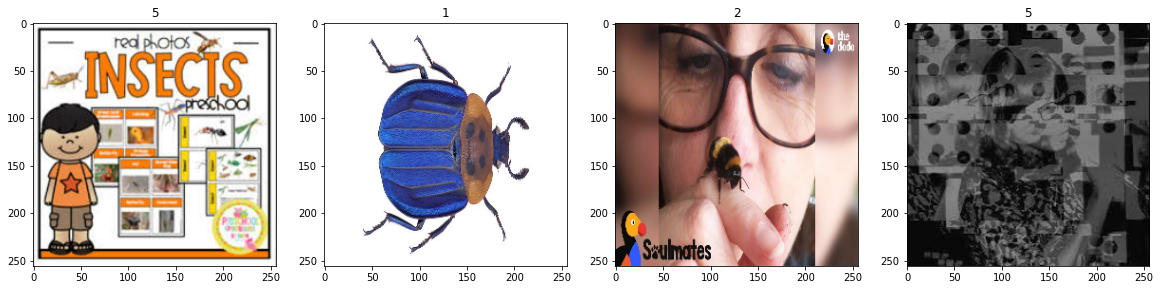

In [19]:
#checking the data by plotting few images

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

##Scale Data

In [20]:
#scaling data to set the values between 0 nad 1

data = data.map(lambda x,y: (x/255, y))

In [21]:
data.as_numpy_iterator().next()

(array([[[[0.9571385 , 0.90911233, 0.854694  ],
          [0.9649816 , 0.9179228 , 0.86302084],
          [0.96133775, 0.9142789 , 0.85937697],
          ...,
          [0.97127956, 0.9163776 , 0.8653972 ],
          [0.97861946, 0.91316295, 0.8509804 ],
          [0.9700149 , 0.90334827, 0.8406032 ]],
 
         [[0.9553156 , 0.90825677, 0.85335475],
          [0.9607843 , 0.9106311 , 0.8572763 ],
          [0.9572245 , 0.91016567, 0.8552637 ],
          ...,
          [0.97123754, 0.91895854, 0.8666667 ],
          [0.98214865, 0.9208359 , 0.85989326],
          [0.9789216 , 0.9161765 , 0.8573529 ]],
 
         [[0.9581342 , 0.91107535, 0.8561734 ],
          [0.9595129 , 0.9071538 , 0.85490197],
          [0.95686275, 0.9098039 , 0.85490197],
          ...,
          [0.96822375, 0.9211649 , 0.8732986 ],
          [0.97215664, 0.9172547 , 0.8662743 ],
          [0.97639596, 0.921494  , 0.8705136 ]],
 
         ...,
 
         [[0.3734528 , 0.25972733, 0.19168198],
          [0.37342

##Split Data

In [22]:
len(data)

32

In [23]:
#setting the size of train, validate and test dataset

train_size = int(len(data)*0.8)
val_size = int(len(data)*.15)
test_size = len(data) - (train_size+val_size)

In [24]:
#checking if the sum of distributed data is equal to total length of data
test_size

3

In [25]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)

##Build Deep Leaning Model

In [26]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3),1, padding='same', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3),1, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3),1, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3),1, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [29]:
from tensorflow.python import losses
model.compile('adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [31]:
logdir = log_folder_path

In [32]:
#using callbacks prevent to generate logs and debug the performance of the model

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
#fitting the model built

hist = model.fit(train_data, epochs = 20, validation_data=val_data, callbacks = [tensorboard_callback])

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 16s 565ms/step - loss: 2.2690 - accuracy: 0.1262 - val_loss: 2.0946 - val_accuracy: 0.1797
Epoch 2/20
25/25 [==============================] - 15s 559ms/step - loss: 2.0557 - accuracy: 0.2050 - val_loss: 1.9494 - val_accuracy: 0.3516
Epoch 3/20
25/25 [==============================] - 15s 566ms/step - loss: 1.9209 - accuracy: 0.2937 - val_loss: 1.8383 - val_accuracy: 0.3828
Epoch 4/20
25/25 [==============================] - 15s 567ms/step - loss: 1.7282 - accuracy: 0.4013 - val_loss: 1.6928 - val_accuracy: 0.4531
Epoch 5/20
25/25 [==============================] - 15s 557ms/step - loss: 1.5320 - accuracy: 0.4875 - val_loss: 1.2684 - val_accuracy: 0.5234
Epoch 6/20
25/25 [==============================] - 15s 563ms/step - loss: 1.1940 - accuracy: 0.5863 - val_loss: 1.0805 - val_accuracy: 0.6250
Epoch 7/20
25/25 [==============================] - 15s 567ms/step - loss: 1.0279 - accuracy: 0.6562 - val_loss: 0.8820 - val_accuracy: 0.7266
Epoch 8/20

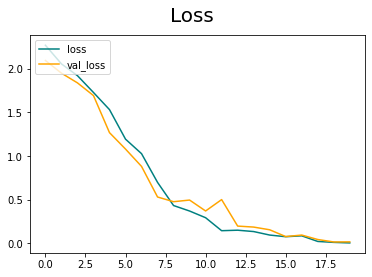

In [34]:
#plot between train data loss and validation data loss

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

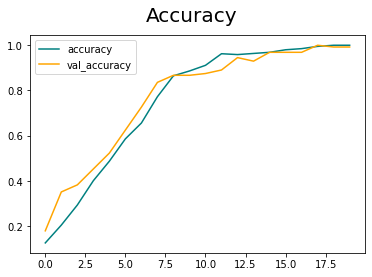

In [35]:
#plot between train data accuracy and validation data accuracy

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


##Performance Evaluation

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
for batch in test_data.as_numpy_iterator(): 
    X,y = batch
    yhat = model.predict(X).argmax(axis=1)
    print(classification_report(y,yhat))

1/1 [==============================] - 0s 231ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         7

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

1/1 [==============================] - 0s 142ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       0.75      1.00      0.86         3
           3       1.00   

##Test data

In [38]:
test_data_path = test_data_dir

In [39]:
os.listdir(test_data_path)

['img4.jpeg', 'img3.jpeg', 'img2.jpeg', 'img1.jpeg']

<class 'str'>


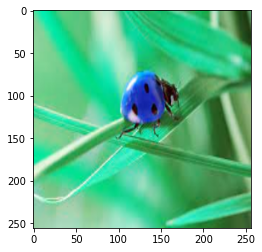

1/1 [==============================] - 0s 29ms/step
the image most likely belongs to class 5 

<class 'str'>


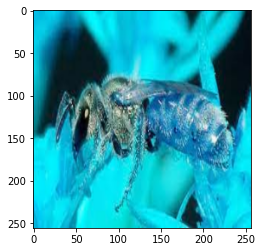

1/1 [==============================] - 0s 28ms/step
the image most likely belongs to class 8 

<class 'str'>


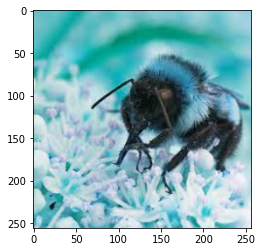

1/1 [==============================] - 0s 28ms/step
the image most likely belongs to class 1 

<class 'str'>


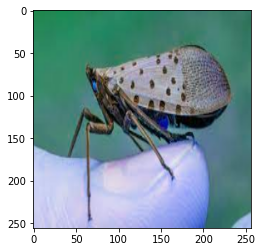

1/1 [==============================] - 0s 28ms/step
the image most likely belongs to class 8 



In [40]:
for img in os.listdir(test_data_path):
  print(type(img))
  
  img_=cv2.imread(os.path.join(test_data_path,img))
  resize_image = tf.image.resize(img_,(256,256))
  plt.imshow(resize_image.numpy().astype(int))
  plt.show()

  yhat = model.predict(np.expand_dims(resize_image/255, 0))
  score = tf.nn.softmax(yhat.round())
  print(f'the image most likely belongs to class {np.argmax(score)} \n')

  

*The color of the images are in BGR as plot reads images in BGR. We can convert these images to RGB by using cv2.cvtColor but that's not necessary.*

##Save the model

In [41]:
from tensorflow.keras.models import load_model

In [42]:
if not os.path.exists(os.path.join(main_dir,'models')):
  os.makedirs(os.path.join(main_dir,'models'))

In [43]:
model_path = os.path.join(main_dir,'models')

model.save(os.path.join(model_path,'multiclass_imageclassifier.h5'))

In [44]:
new_model = load_model(os.path.join(main_dir,'models/multiclass_imageclassifier.h5'))

In [45]:
new_model.predict(np.expand_dims(resize_image/255, 0))

1/1 [==============================] - 0s 85ms/step


array([[1.1294787e-02, 9.9176867e-03, 6.7406006e-02, 1.7573342e-04,
        1.0720268e-03, 3.2466784e-02, 3.9172443e-03, 1.6134481e-04,
        8.7358838e-01]], dtype=float32)

MIT License

Copyright (c) 2022 Bhawana Agarwal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

References - 
https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
https://www.tensorflow.org/tutorials/images/classification
https://www.analyticsvidhya.com/blog/2020/02/mathematics-behind-convolutional-neural-network/